## Has the network latency gone up since we switched ISPs?

**$H_0$: "Latency hasn't changed after the switch in ISP."**

**$H_a$: "Latency has changed after the switch in ISP."**


**True Positive**
- $H_0$ is rejected, latency has gone up
- low p-value
- avg latency after the switch is higher than the average latency before the switch


**False Positive**
- $H_0$ is rejected
- low p-value
- a significant difference found in latency prior to and after
- we found the latency prior was lower than our measured, external factors impact latency
- server crash, downloads, many users etc


**False Negative**
- $H_0$ is accepted
- high p-value
- we found the latency to be equal, sampling bias, technology, time of day of test


**True Negative**
- $H_0$ is true
- high p-value
- Latency has stayed the same or gone down

----
## Is the website redesign any good?

**$H_0$: "Web traffic has stayed the same."**

**$H_a$: "Web traffic has changed.**


**True Positive**
- low p-value
- $H_0$ is rejected and false
- Traffic has statistically increased significantly

**False Positive**
low p-value
- $H_0$ is rejected and true 
- traffic increased, due to external factors, holiday season

**False Negative**
- high p-value
- $H_0$ is accepted
- traffic looked like it stayed the same, sample size

**True Negative**
- high p-value
- $H_0$ is true, failed to be rejected
- traffic stayed the same

----
## Is our TV ad driving more sales?

**$H_0$: "Sales have remained the same after the tv add."**

**$H_a$: "Sales have changed after the tv add."**


**True Positive**
- Ho is rejected and false
- low p-value
- sales has statistically increased, significantly

**False Positive**
- Ho is rejected and true 
- low p-value
- sales increased, due to external factors

**False Negative**

- Ho is accepted
- high p-value
- sales looked like it stayed the same, but they didnt, sample size

**True Negative**
- Ho is true, failed to be rejected
- high p-value
- sales stayed the same, tv ad was a flop

----
### T-test Excercises

**Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.**
    
    Office 1:

    - A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

    Office 2:

    - A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 

- Use a .05 level of significance.


**Load the mpg dataset and use it to answer the following questions:**

  - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
  
  - Are compact cars more fuel-efficient than the average car?


  - Do manual cars get better gas mileage than automatic cars?

In [265]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pydataset import data

In [266]:
# (focal question) is the average time it takes to sell a home different between the two offices?

# (Goal) compare the mean time of home sell of two (2) groups 
# this will be 2 independent T-tests comparison
# since I am only given the descriptive statistics of the two (2) office groups - i will need to use the "stats.ttest_ind_from_stats()" function

alpha = 0.05

office_1_sample = 40 # number of sales
office_1_mean = 90 # number of days
office_1_std_dev = 15 # number of days

office_2_sample = 50 # number of sales
office_2_mean = 100 # number of days
office_2_std_dev = 20 # number of days

#### Hypothesis Generation

$H_0$: "There's no difference in the average time it takes Office 1 and Office 2 to sell a home."

$H_a$: There is a difference in the average time it takes Office 1 and Office 2 to sell a home."

In [267]:
# comparing sample variances 
office_1_std_dev**2 # where sample var = 225 days squared
office_2_std_dev**2 # where sample var = 400 days squared

400

In [268]:
t_test, p_value = stats.ttest_ind_from_stats(
    office_1_mean, office_1_std_dev, office_1_sample,
    office_2_mean, office_2_std_dev, office_2_sample,
    equal_var=False
)

if p_value < alpha: 
    print(f"REJECT the Null Hypothesis. There IS an average home-sale time difference across both offices.")
else: 
    print(f"FAILED to reject the Null Hypothesis. There is NOT an average home-sale time difference across both offices.")

REJECT the Null Hypothesis. There IS an average home-sale time difference across both offices.


----

In [269]:
mpg_db = data('mpg')

In [270]:
#  1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
#  2. Are compact cars more fuel-efficient than the average car?
#  3. Do manual cars get better gas mileage than automatic cars?

### Framing the Scientific Question / Experiment

    Focal Question: Is there a difference in fuel-efficiency in cars from 2008 vs. cars from 1999? 

"Fuel-efficiency" as measured by "total average miles", or said another way: the combined average of cars' city and highway miles.

**Assumptions:**

- Both comparisons are independent of ea. other
- Sample size is > 30 records/observations
- Variances across both samples will be different

----

In [271]:
mpg_db.dtypes # whereby city and highway miles are both int type (check: will make it easier to sum and average)

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [272]:
mpg_db['year'].unique() # i am able to see that there are only 2 year periods in this dataset (2008 and 1999)

array([1999, 2008])

In [273]:
# creating a new column called "total_avg_mpg"
mpg_db['total_avg_mpg'] = (mpg_db['cty'] + mpg_db['hwy']) / 2

# verifying the results of the newly created column
mpg_db.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total_avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [274]:
# reording the columns to place the information i will be looking at, earlier in the dataframe

column_lst = list(mpg_db.columns.values)
mpg_db = mpg_db[[
    'manufacturer',
    'year',
    'model',
    'cty',
    'hwy',
    'total_avg_mpg',
    'displ',
    'cyl',
    'trans',
    'drv',
    'fl',
    'class'
 ]]

mpg_db.head() # this checks out!

,manufacturer,year,model,cty,hwy,total_avg_mpg,displ,cyl,trans,drv,fl,class
1,audi,1999,a4,18,29,23.5,1.8,4,auto(l5),f,p,compact
2,audi,1999,a4,21,29,25.0,1.8,4,manual(m5),f,p,compact
3,audi,2008,a4,20,31,25.5,2.0,4,manual(m6),f,p,compact
4,audi,2008,a4,21,30,25.5,2.0,4,auto(av),f,p,compact
5,audi,1999,a4,16,26,21.0,2.8,6,auto(l5),f,p,compact


In [275]:
# next, I will conduct some initial analysis that should also help inform my assumptions and help determine the correct method to take for comparing these two (2) car samples

len(mpg_db[mpg_db['year'] == 2008]) # 117 total 2008 vehicles in df
len(mpg_db[mpg_db['year'] == 1999]) # 117 total 1999 vehicles in df

# both samples are > 30 observations
# next i'll calculate the mean and std_deviation for 2008 & 1999 vehicles

117

In [276]:
round(mpg_db[["year", "total_avg_mpg"]].groupby("year").mean(), 1)
# similar means for both years

,total_avg_mpg
year,
1999,20.2
2008,20.1


In [277]:
round(mpg_db[["year", "total_avg_mpg"]].groupby("year").std(), 1)
# standard deviation
# 1999	5.2 actual
# 2008	4.9 actual

,total_avg_mpg
year,
1999,5.2
2008,4.9


In [278]:
# let's check the variance
import math
round(mpg_db[["year", "total_avg_mpg"]].groupby("year").var(), 3)

print(math.sqrt(27.1)) # check's out
print(math.sqrt(24.1)) # check's out

5.205766033928148
4.909175083453431


#### Hypothesis Generation and alpha

**$H_0$:** 
    
- "There is NO difference in fuel-efficiency across vehicles made in 2008 and 1999."

**$H_a$:**

  - "There IS a difference in fuel-effiency across vehicles made in 2008 and 1999."

**Fuel-effiency**:

- as measured by the combined total average of city and highway miles. 

**Where:** (next step)

- lower total_avg_mpg = "less fuel-efficient" and...
- higher total_avg_mpg = "more fuel-efficient"
  
$\alpha$ = 0.05

<AxesSubplot:>

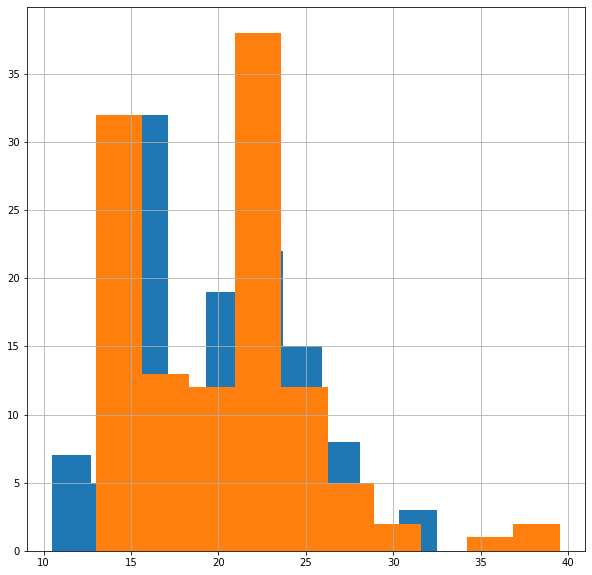

In [293]:
alpha = 0.05

mpg_1999_sample = mpg_db[mpg_db.year == 1999].total_avg_mpg
mpg_2008_sample = mpg_db[mpg_db.year == 2008].total_avg_mpg

plt.figure(figsize= (10, 10))
mpg_2008_sample.hist()
mpg_1999_sample.hist()

In [280]:
t_score, p_value = stats.ttest_ind(mpg_1999_sample, mpg_2008_sample)

In [281]:
if (p_value < alpha) and t_score > 0:
    print("REJECT the Null Hypothesis. There IS a fuel-efficiency difference in vehicles made in 2008 and 1999.")
else:
    print("CANNOT reject the Null Hypothesis.")

CANNOT reject the Null Hypothesis.


In [282]:
p_value 

0.8263744040323578

----
####  MPG Dataset Question #2: Are compact cars more fuel-efficient than the average car?

$H_0$: "Mean of compact car fuel-efficiency is <= the mean fuel-effiecincy of average cars."

$H_a$: "Mean of compact car fuel-efficiency is > the mean fuel-effiecincy of average cars. "

**paremeters:**

fuel-efficiency: 
- higher total average mpg

average car: 
- NOT compact (all other cars in population excluding compact, and subcompact cars)


$\alpha$ = 0.05

In [283]:
alpha = 0.05

In [284]:
mpg_db['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [285]:
# for comparison to population mean -- creating a series with just compact car total avg mpg
compact_sample = mpg_db[mpg_db['class'] == "compact"].total_avg_mpg
compact_sample
# compact_mean = round(compact_sample['total_avg_mpg'].mean(), 2)
#  24.21 total mpg mean

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
6      22.0
7      22.5
8      22.0
9      20.5
10     24.0
11     23.0
12     20.0
13     21.0
14     21.0
15     20.0
142    25.0
143    23.0
170    22.5
171    23.5
172    22.0
173    23.5
187    24.0
188    25.0
189    26.0
190    26.5
191    22.0
192    22.0
193    22.5
194    27.0
195    28.5
196    30.5
197    32.5
198    30.5
208    25.0
209    22.5
210    25.0
211    25.5
212    20.5
213    38.5
214    25.0
215    22.5
216    25.5
217    25.0
218    25.0
219    25.0
220    19.5
221    20.5
Name: total_avg_mpg, dtype: float64

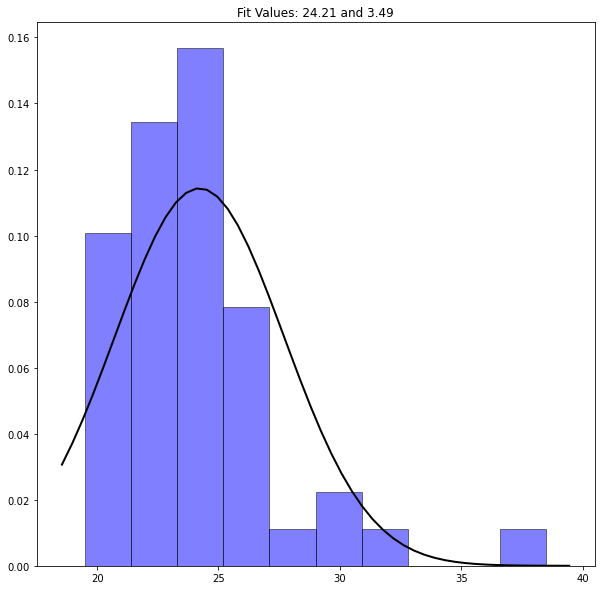

In [340]:
from scipy.stats import norm
import seaborn as sns
plt.figure(figsize= (10, 10))

mu, std = norm.fit(compact_sample) 

# plotting compact sample values
plt.hist(compact_sample, edgecolor= "black", color='blue', density=True, alpha=0.5)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()

In [286]:
# compact_std = round(compact_sample['total_avg_mpg'].std(), 2)
# 3.53 standard deviation

In [287]:
# calculating the compact sample size
# len(compact_sample) # 47 records/oberservations, which should be enough for our t_test comparison

In [288]:
# math.sqrt(compact_std) # checking the variance -- which checks out

In [289]:
# calculating the mean, and standard deviation for cars other than compact
average_sample = mpg_db[(mpg_db['class'] != "compact") & (mpg_db['class'] != "subcompact")]
average_sample['class'].unique()

array(['midsize', 'suv', '2seater', 'minivan', 'pickup'], dtype=object)

In [290]:
# next, i want to calculate the mean, and standard deviation for the average car sample

average_mean = round(average_sample['total_avg_mpg'].mean(), 2)
# 17.95 total mpg mean

# average_std = round(average_sample['total_avg_mpg'].std(), 2)
# 4.02 standard deviation

In [291]:
# calculating the sample size
# len(average_sample) # 152 records or observations, which should be enough for our t_test comparison

In [292]:
t_score, p_value = stats.ttest_1samp(compact_sample, average_mean)

if (p_value/2) < alpha and t_score > 0: 
    print(f"REJECT the Null Hypothesis. Compact Cars have GREATER fuel-efficiency that average cars.")
else: 
    print(f"Failed to reject the Null Hypothesis.")

REJECT the Null Hypothesis. Compact Cars have GREATER fuel-efficiency that average cars.
